# EXO MACHINE LEARNING
Phần code sử dụng các thư viện để lọc và trình bày dữ liệu và dùng ML để dự đoán giá nhà ở Hà Nội

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Lọc và chuyển dạng dữ liệu cho các data cần thiết

In [48]:
df = pd.read_csv('vietnam_housing_dataset.csv')
df['Floors'] = pd.to_numeric(df['Floors'], errors='coerce')
df['Floors'] = df['Floors'].astype(pd.Int64Dtype())
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bedrooms'] = df['Bedrooms'].astype(pd.Int64Dtype())
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')
df['Bathrooms'] = df['Bathrooms'].astype(pd.Int64Dtype())
df['Price'] = df['Price']*1000
df['Giá/m2'] = (df['Price']/df['Area']).round(2)
df['Access Road'] = pd.to_numeric(df['Access Road'], errors='coerce')
df['Access Road'] = df['Access Road'].astype(pd.Float64Dtype())
df['Frontage'] = pd.to_numeric(df['Frontage'], errors='coerce')
df['Frontage'] = df['Frontage'].astype(pd.Float64Dtype())
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Area'] = df['Area'].astype(pd.Float64Dtype())
df

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,Giá/m2
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,<NA>,<NA>,NaN,NaN,4,<NA>,<NA>,Have certificate,NaN,8600.0,102.38
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,<NA>,<NA>,NaN,NaN,5,<NA>,<NA>,NaN,NaN,7500.0,125.00
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5,<NA>,<NA>,Sale contract,NaN,8900.0,98.89
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,<NA>,3.5,Tây - Nam,Tây - Nam,2,2,3,Have certificate,Full,5350.0,99.07
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,<NA>,<NA>,Đông - Nam,Đông - Nam,2,4,4,Have certificate,Full,6900.0,75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30224,"Đường Lê Quang Định, Phường 1, Gò Vấp, Hồ Chí ...",67.0,4.1,16.0,NaN,NaN,1,3,2,Have certificate,NaN,4600.0,68.66
30225,"Đường Ngô Gia Tự, Phường Đức Giang, Long Biên,...",30.0,<NA>,<NA>,NaN,NaN,5,3,3,Have certificate,NaN,4700.0,156.67
30226,"Đường Gò Dưa, Phường Tam Bình, Thủ Đức, Hồ Chí...",69.4,4.0,15.0,Đông - Bắc,Đông - Bắc,<NA>,<NA>,<NA>,Have certificate,Basic,7500.0,108.07
30227,"Đường Quang Trung, Phường 11, Gò Vấp, Hồ Chí Minh",96.0,<NA>,8.0,NaN,NaN,4,<NA>,<NA>,NaN,NaN,9500.0,98.96


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  Float64
 2   Frontage           18665 non-null  Float64
 3   Access Road        16932 non-null  Float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  Int64  
 7   Bedrooms           25067 non-null  Int64  
 8   Bathrooms          23155 non-null  Int64  
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
 12  Giá/m2             30229 non-null  float64
dtypes: Float64(3), Int64(3), float64(2), object(5)
memory usage: 3.2+ MB


# Xem xét mối liên hệ giữa giá nhà và số tầng
Sử dụng seaborn để trình bày boxplot thể hiện mối quan hệ giá nhà theo số tầng

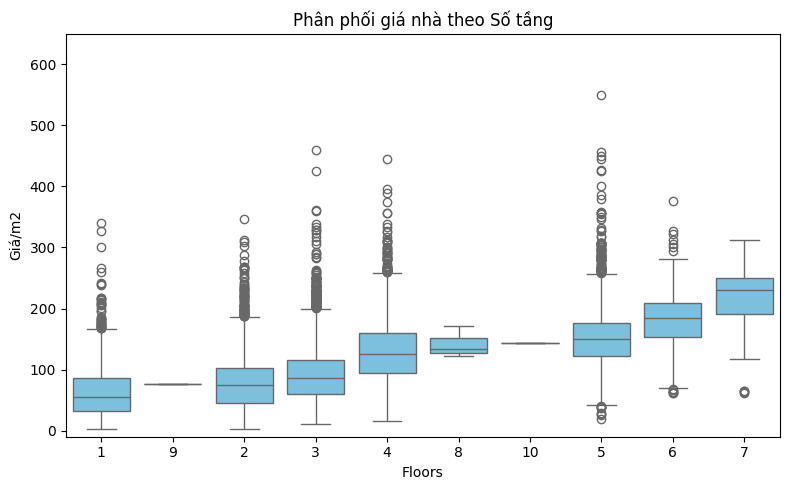

In [50]:
df['Floors'] = pd.Categorical(df['Floors'], 
                            categories=df.groupby('Floors')['Giá/m2'].mean().sort_values().index, ordered=True)

# Vẽ boxplot theo Số tầng
plt.figure(figsize=(8, 5))
sns.boxplot(x='Floors', y='Giá/m2', data=df, color = "#6CC6ED")
plt.ylim(-10, 650)
plt.title('Phân phối giá nhà theo Số tầng')
plt.tight_layout()

# Nhận xét:
Trong nguồn dữ liệu, số liệu dữ liệu về nhà có 9 tầng, 10 tầng chiếm số lượng quá nhỏ --> làm cho việc trình bày boxplot trở nên khó khăn và không thể hiện rõ mối liên hệ
Các dữ liệu về các nhà có số tầng khác có xu hướng: *"Càng nhiều tầng thì giá càng cao"*
*NOTE: vẫn xuất hiện các outliers, có thể do vị trí địa lý

Do có nhiều dữ liệu chưa sạch (trình bày address ở nhiều định dạng) và address quá cụ thể nên không thể đưa ra những phân tích tổng quan cho tập dữ liệu nên lọc address qua Tỉnh/thành: Chỉ phân tích kỹ quận, huyện của thành phố HCM và Hà Nội; các tỉnh thành khác chỉ phân tích tổng quan ở cấp tỉnh

In [51]:
df['Address'] = df['Address'].str.split(', ').str[-2:].str.join(', ')
df['Address'] = df['Address'].str.replace(r'\s*TP\s*', 'Thành phố', regex=True)
df['Address'] = df['Address'].str.replace(r'HN|Hà Nội\.|Hà Nội\s*$', 'Hà Nội', regex=True)
df['Address'] = df['Address'].str.replace(r'TP\.HCM|TP Hồ Chí Minh\s*$', 'Thành phố Hồ Chí Minh', regex=True)
df['Address'] = df['Address'].str.strip()
df['Address'] = df['Address'].str.replace(r'[^\w\s]+$', '', regex=True)
df['Address'] = df['Address'].str.strip()
df['Tỉnh/thành'] = df['Address'].str.split(', ').str[-1].str.strip()
df['Address'] = np.where(df['Tỉnh/thành'].isin(['Hà Nội', 'Hồ Chí Minh']), df['Address'], df['Tỉnh/thành'])
df

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,Giá/m2,Tỉnh/thành
0,Hưng Yên,84.0,<NA>,<NA>,NaN,NaN,4,<NA>,<NA>,Have certificate,NaN,8600.0,102.38,Hưng Yên
1,Hưng Yên,60.0,<NA>,<NA>,NaN,NaN,5,<NA>,<NA>,NaN,NaN,7500.0,125.00,Hưng Yên
2,Hưng Yên,90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5,<NA>,<NA>,Sale contract,NaN,8900.0,98.89,Hưng Yên
3,"Gò Vấp, Hồ Chí Minh",54.0,<NA>,3.5,Tây - Nam,Tây - Nam,2,2,3,Have certificate,Full,5350.0,99.07,Hồ Chí Minh
4,"Gò Vấp, Hồ Chí Minh",92.0,<NA>,<NA>,Đông - Nam,Đông - Nam,2,4,4,Have certificate,Full,6900.0,75.00,Hồ Chí Minh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30224,"Gò Vấp, Hồ Chí Minh",67.0,4.1,16.0,NaN,NaN,1,3,2,Have certificate,NaN,4600.0,68.66,Hồ Chí Minh
30225,"Long Biên, Hà Nội",30.0,<NA>,<NA>,NaN,NaN,5,3,3,Have certificate,NaN,4700.0,156.67,Hà Nội
30226,"Thủ Đức, Hồ Chí Minh",69.4,4.0,15.0,Đông - Bắc,Đông - Bắc,NaN,<NA>,<NA>,Have certificate,Basic,7500.0,108.07,Hồ Chí Minh
30227,"Gò Vấp, Hồ Chí Minh",96.0,<NA>,8.0,NaN,NaN,4,<NA>,<NA>,NaN,NaN,9500.0,98.96,Hồ Chí Minh


In [52]:
# Sau khi đã đưa về dạng Quận, Tỉnh/thành thì có những address bị sai định dạng --> bỏ đi
df = df[df['Address'].map(df['Address'].value_counts()) > 1]

C:\Users\admin\AppData\Local\Temp\ipykernel_24320\1637928881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = pd.Categorical(df['Address'],


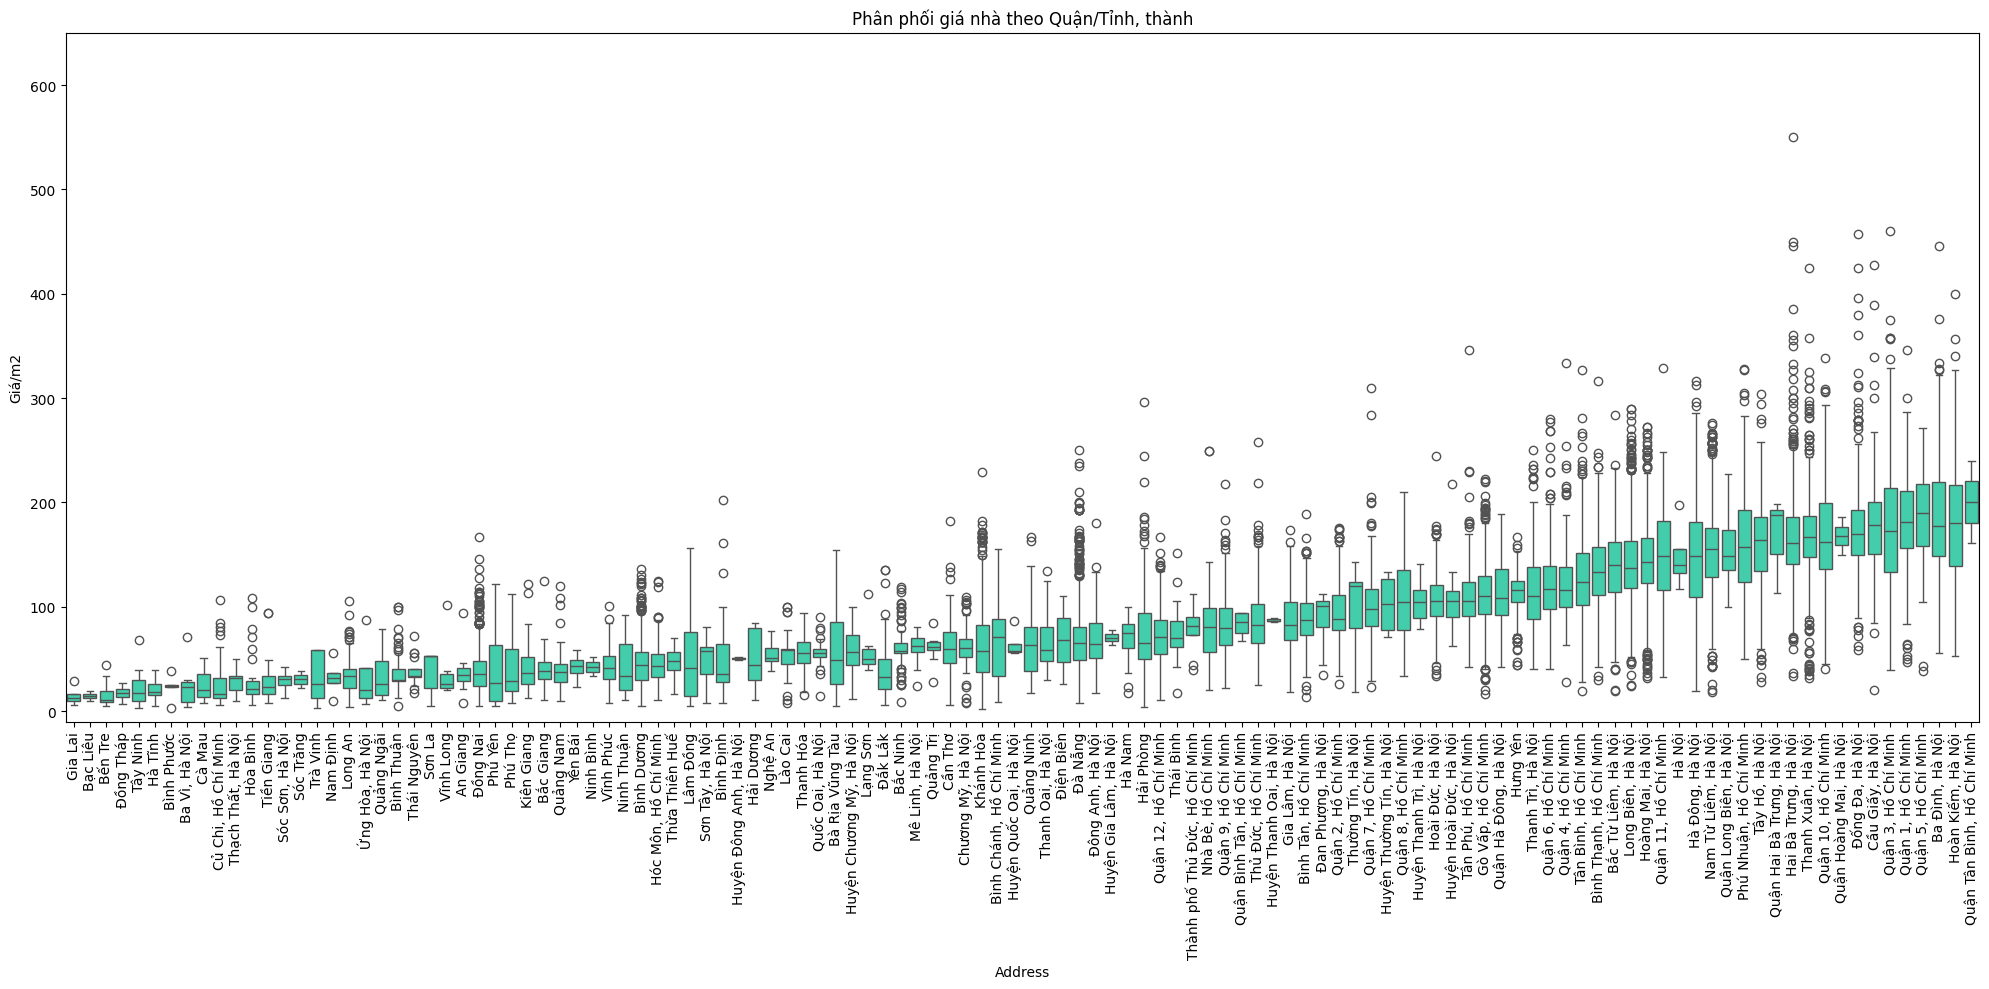

In [53]:
df['Address'] = pd.Categorical(df['Address'], 
                             categories=df.groupby('Address')['Giá/m2'].mean().sort_values().index,
                             ordered=True)

# Vẽ boxplot theo Quận
plt.figure(figsize=(20, 10))
sns.boxplot(x='Address', y='Giá/m2', data=df, color = "#2DE4B6")
plt.xticks(rotation=90)
plt.ylim(-10, 650)
plt.title('Phân phối giá nhà theo Quận/Tỉnh, thành')
plt.tight_layout()
plt.show()

## Nhận xét:
Ở 2 thành phố lớn Hà Nội, TP Hồ Chí Minh: giá nhà có khoảng biến thiên lớn và có mức giá cao hơn so với các tỉnh thành khác. Outliers ở hai thành phố này cũng xuất hiện nhiều hơn so với những nơi khác.

# SỬ DỤNG MACHINE LEARNING ĐỂ DỰ ĐOÁN GIÁ NHÀ TẠI VIỆT NAM


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd            
import numpy as np             
import seaborn as sns              
import matplotlib.pyplot as plt

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df[["Address", "Frontage", "Legal status","Floors","Bedrooms","Area", "Access Road","Bathrooms", "House direction", "Balcony direction"]], df["Giá/m2"], 
    random_state = 0, test_size=0.3)

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Sử dụng Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators = 100,    
    max_depth = 50,        
    max_features = 9,       
    random_state = 10,      
)

rf_model.fit(X_train_encoded, Y_train)

Y_pred = rf_model.predict(X_test_encoded)

X_test_display = X_test.copy()

X_test_display["Giá/m2_thực_tế"] = Y_test.values
X_test_display["Giá/m2_dự_đoán"] = Y_pred

print(X_test_display.head(10))
print(f"Sai số tuyệt đối trung bình: {mean_absolute_error(Y_test, Y_pred):.2f}")
print(f"Hệ số xác định (R²): {r2_score(Y_test, Y_pred):.3f}")

                    Address  Frontage      Legal status Floors  Bedrooms  \
25783            Bình Dương      <NA>  Have certificate      2         3   
15516   Gò Vấp, Hồ Chí Minh       5.2  Have certificate      4         4   
24689   Quận 5, Hồ Chí Minh      <NA>  Have certificate      5         5   
4818   Tân Phú, Hồ Chí Minh       4.0  Have certificate      3         3   
428                Hưng Yên       4.0  Have certificate      5         6   
12405   Quận 7, Hồ Chí Minh      4.55  Have certificate      3         4   
5533    Quận 9, Hồ Chí Minh       5.0  Have certificate      2         3   
14446               Cần Thơ       5.0  Have certificate      3         4   
23336   Nhà Bè, Hồ Chí Minh      <NA>  Have certificate      2         2   
14398   Nam Từ Liêm, Hà Nội      <NA>  Have certificate      5         4   

       Area  Access Road  Bathrooms House direction Balcony direction  \
25783  66.3         <NA>          2             NaN               NaN   
15516  58.0      

## Kết quả
Dự đoán có sai số trung bình: ***19 - 20 triệu***


# TRỰC QUAN HÓA DỮ LIỆU

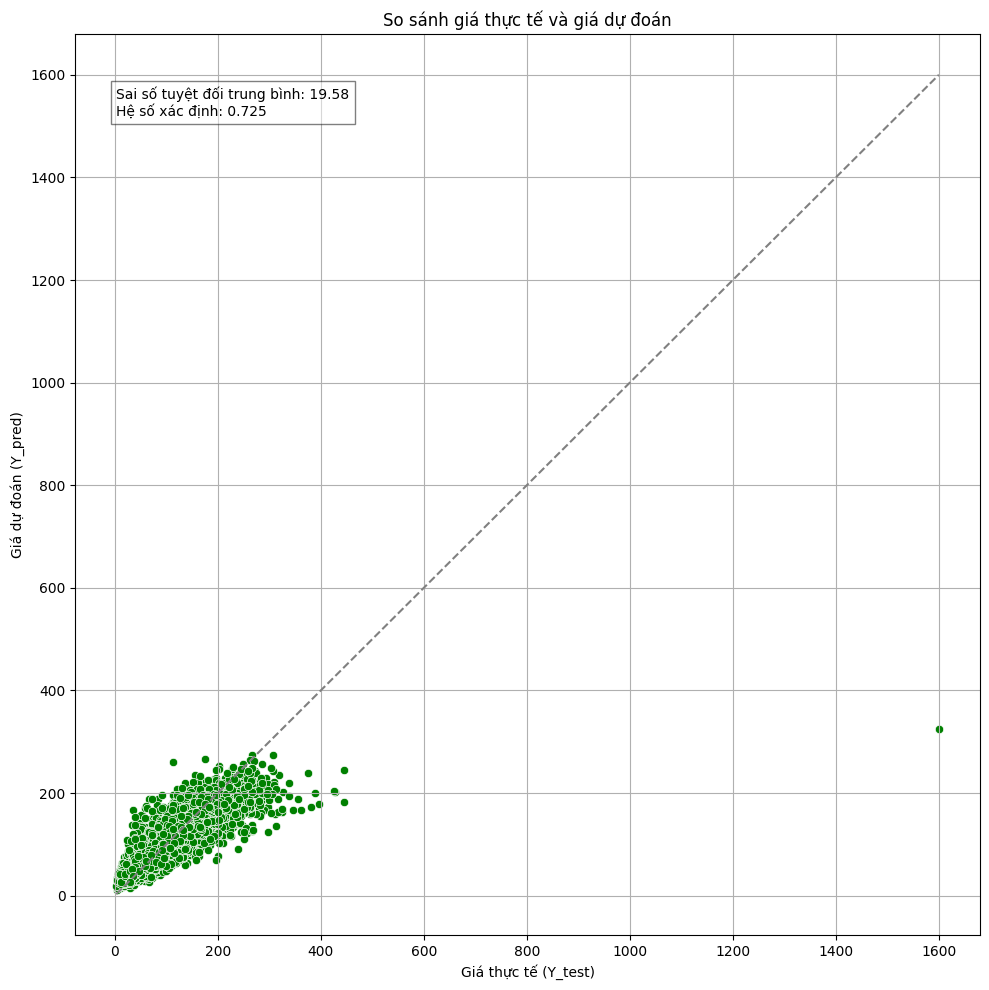

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df[["Address", "Frontage", "Legal status","Floors","Bedrooms","Area", "Access Road","Bathrooms", "House direction", "Balcony direction"]], df["Giá/m2"], 
    random_state = 0, test_size=0.3)

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)


X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Sử dụng Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators = 100,      
    max_depth = 50,       
    max_features = 9,        
    random_state = 10,      
)


rf_model.fit(X_train_encoded, Y_train)


Y_pred = rf_model.predict(X_test_encoded)

# Trực quan bằng matplotlib và seaborn
plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=Y_pred, c='g')


plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()], color = "grey", linestyle='--')

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
plt.text(x=Y_test.min(), 
         y=Y_test.max()*0.95, 
         s=f"Sai số tuyệt đối trung bình: {mae:.2f}\nHệ số xác định: {r2:.3f}", 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Giá thực tế (Y_test)')
plt.ylabel('Giá dự đoán (Y_pred)')
plt.title('So sánh giá thực tế và giá dự đoán')
plt.grid(True)
plt.tight_layout()

Hình ảnh trực quan dữ liệu khi zoom khu vực dữ liệu chính:

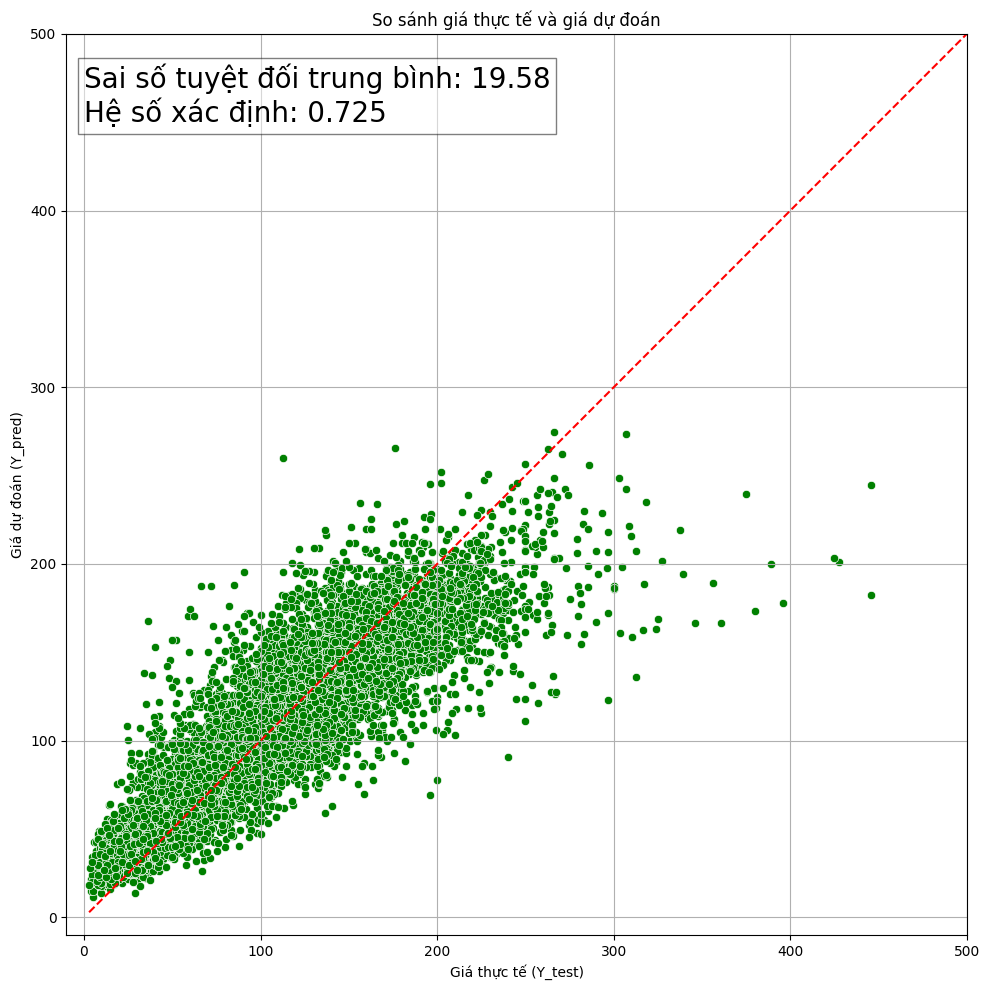

In [57]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=Y_pred, c='g')


plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()], color = "red", linestyle='--')

mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

plt.xlabel('Giá thực tế (Y_test)')
plt.text(x=0, y=450,
         s=f"Sai số tuyệt đối trung bình: {mae:.2f}\nHệ số xác định: {r2:.3f}", 
         fontsize=20, 
         bbox=dict(facecolor='white', alpha=0.5))
plt.xlim(-10,500)
plt.ylim(-10, 500)
plt.ylabel('Giá dự đoán (Y_pred)')
plt.title('So sánh giá thực tế và giá dự đoán')
plt.grid(True)
plt.tight_layout()